In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###***Importacion de librerias***

In [ ]:
import pandas as pd
import pyarrow
import requests
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np


###Eliminar columnas

###Redondeamos los valores de cada fila para facilitar la comprehension de los modelos a la hora de entrenar.

De aqui tomar marca y modelo

In [ ]:
# df_electric_tnCO2
# df_flota_inicial leer los dos csv  y convertirlos en df de pandas para manipularlos

import pandas as pd
df_electric_tnCO2 = pd.read_csv('/content/drive/MyDrive/Proyecto FInal Henry/MACHINE LEARNING/electric_tnCO2_100mi.csv', sep= ';')
df_flota_inicial = pd.read_csv('/content/drive/MyDrive/Proyecto FInal Henry/MACHINE LEARNING/flota_inicial.csv', sep= ',')


In [ ]:
df_electric_tnCO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Category                           70 non-null     object 
 1   Model                              70 non-null     object 
 2   Model Year                         70 non-null     int64  
 3   Manufacturer                       70 non-null     object 
 4   Fuel                               70 non-null     object 
 5   ↑ All-Electric Range               70 non-null     int64  
 6   Alternative Fuel Economy City      70 non-null     int64  
 7   Alternative Fuel Economy Highway   70 non-null     int64  
 8   Alternative Fuel Economy Combined  70 non-null     int64  
 9   Engine Type                        70 non-null     object 
 10  Engine Size                        70 non-null     object 
 11  tnco2/100mi                        70 non-null     float64
 

In [ ]:
#df_electric_tnCO2 de este dataframe borrar la columna price

df_electric_tnCO2 = df_electric_tnCO2.drop(columns=['price'])


In [ ]:
# Manufacturer muestra informacion de la columna dentro del mismo dataframe df_electric_tnCO2

print(df_electric_tnCO2['Manufacturer'].value_counts())


Manufacturer
Tesla         24
Ford          15
Volkswagen     9
Nissan         6
Hyundai        6
Kia            5
Chevrolet      3
Mazda          1
Kandi          1
Name: count, dtype: int64


In [ ]:
# otorga un valor entero a los datos de la columna Manufacturer teniendo en cuenta estos datos Tesla         24
# Ford          15
# Volkswagen     9
# Nissan         6
# Hyundai        6
# Kia            5
# Chevrolet      3
# Mazda          1
# Kandi          1

manufacturer_mapping = {
    "Tesla": 0,
    "Ford": 1,
    "Volkswagen": 2,
    "Nissan": 3,
    "Hyundai": 4,
    "Kia": 5,
    "Chevrolet": 6,
    "Mazda": 7,
    "Kandi": 8,
}

df_electric_tnCO2['Manufacturer'] = df_electric_tnCO2['Manufacturer'].map(manufacturer_mapping)


In [ ]:
print(df_electric_tnCO2['Fuel'].value_counts())

Fuel
Electric    70
Name: count, dtype: int64


In [ ]:
#convierte la columna Fuel a entero

fuel_mapping = {
    'Electric': 0,
}

df_electric_tnCO2['Fuel'] = df_electric_tnCO2['Fuel'].map(fuel_mapping)


In [ ]:
# elimina la columna Engine Type

df_electric_tnCO2 = df_electric_tnCO2.drop(columns=['Engine Type'])


In [ ]:
df_electric_tnCO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Category                           70 non-null     object 
 1   Model                              70 non-null     object 
 2   Model Year                         70 non-null     int64  
 3   Manufacturer                       70 non-null     int64  
 4   Fuel                               70 non-null     int64  
 5   ↑ All-Electric Range               70 non-null     int64  
 6   Alternative Fuel Economy City      70 non-null     int64  
 7   Alternative Fuel Economy Highway   70 non-null     int64  
 8   Alternative Fuel Economy Combined  70 non-null     int64  
 9   Engine Size                        70 non-null     object 
 10  tnco2/100mi                        70 non-null     float64
dtypes: float64(1), int64(7), object(3)
memory usage: 6.1+ KB


In [ ]:
print(df_electric_tnCO2['Category'].value_counts())

Category
Sedan/Wagon    36
SUV            34
Name: count, dtype: int64


In [ ]:
#  convierte esta columna Category a numerica  y se reflejen en numeros enteros

category_mapping = {
    'SUV': 0,
    'Midsize Car': 1,
    'Compact Car': 2,
    'Luxury Car': 3,
    'Sports Car': 4,
    'Hatchback': 5,
    'Pickup Truck': 6,
    'Van': 7,
    'Convertible': 8,
}

df_electric_tnCO2['Category'] = df_electric_tnCO2['Category'].map(category_mapping)

df_electric_tnCO2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Category                           34 non-null     float64
 1   Model                              70 non-null     object 
 2   Model Year                         70 non-null     int64  
 3   Manufacturer                       70 non-null     int64  
 4   Fuel                               70 non-null     int64  
 5   ↑ All-Electric Range               70 non-null     int64  
 6   Alternative Fuel Economy City      70 non-null     int64  
 7   Alternative Fuel Economy Highway   70 non-null     int64  
 8   Alternative Fuel Economy Combined  70 non-null     int64  
 9   Engine Size                        70 non-null     object 
 10  tnco2/100mi                        70 non-null     float64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ KB


In [ ]:
print(df_electric_tnCO2['tnco2/100mi'].value_counts())

tnco2/100mi
0.036788    5
0.044172    3
0.036074    3
0.037178    3
0.035271    2
0.037546    2
0.042098    2
0.033497    2
0.038305    2
0.045511    2
0.043068    2
0.040859    2
0.044908    1
0.045277    1
0.041719    1
0.034233    1
0.048924    1
0.047407    1
0.039822    1
0.030921    1
0.039387    1
0.030184    1
0.037915    1
0.035706    1
0.040491    1
0.053855    1
0.041964    1
0.034970    1
0.047485    1
0.042332    1
0.040960    1
0.042856    1
0.042700    1
0.038651    1
0.041227    1
0.033865    1
0.039755    1
0.038283    1
0.048221    1
0.041596    1
0.048589    1
0.044753    1
0.050821    1
0.034133    1
0.031858    1
0.031099    1
0.037926    1
0.050442    1
0.043236    1
0.042477    1
0.039443    1
0.037547    1
Name: count, dtype: int64


In [ ]:
# convierte a numericos enteros la metrica de la columna tnco2/100mi para usarlo en un KPI

df_electric_tnCO2['tnco2/100mi'] = df_electric_tnCO2['tnco2/100mi'].apply(lambda x: int(x))


In [ ]:
#informacion de columna Model

print(df_electric_tnCO2['Model'].value_counts())


Model
Mustang Mach-E GT AWD                    3
Mustang Mach-E AWD                       2
ID.4 Pro S                               2
Bolt EV                                  2
Model Y Performance AWD                  2
ID.4 AWD Pro                             2
Mustang Mach-E RWD Extended              2
Mustang Mach-E RWD California Route 1    2
Mustang Mach-E RWD                       2
Mustang Mach-E AWD Extended              2
Model S Plaid (21" Wheels)               2
ID.4 Pro                                 2
Kona Electric                            2
Model 3 Performance AWD                  2
Leaf SV/SL (62 kWh battery pack)         2
Leaf (62 kWh battery pack)               2
Leaf (40 kWh battery pack)               2
Niro Electric                            2
ID.4 1st                                 1
Model X AWD                              1
Model X Plaid (20" Wheels)               1
Model X Plaid (22" Wheels)               1
Model Y AWD                              1
Model

In [ ]:
columnas_df = df_electric_tnCO2.columns.tolist()
print(columnas_df)


['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel', '↑ All-Electric Range', 'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined', 'Engine Size', 'tnco2/100mi']


In [ ]:
df_electric_tnCO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Category                           34 non-null     float64
 1   Model                              70 non-null     object 
 2   Model Year                         70 non-null     int64  
 3   Manufacturer                       70 non-null     int64  
 4   Fuel                               70 non-null     int64  
 5   ↑ All-Electric Range               70 non-null     int64  
 6   Alternative Fuel Economy City      70 non-null     int64  
 7   Alternative Fuel Economy Highway   70 non-null     int64  
 8   Alternative Fuel Economy Combined  70 non-null     int64  
 9   Engine Size                        70 non-null     object 
 10  tnco2/100mi                        70 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 6.1+ KB


Los resultados parecen ser recomendaciones basadas en ciertos modelos de autos eléctricos de diferentes fabricantes. Cada modelo de auto tiene asociado un conjunto de números entre corchetes que podrían representar índices o identificadores únicos, seguidos por valores numéricos decimales que podrían indicar una puntuación o nivel de recomendación.

A continuación, se presenta una tabla con los detalles:

Tesla
Modelo: Mustang Mach-E GT AWD
Recomendaciones: [(39, 0.041), (48, 0.037), (38, 0.037)]
Ford
Modelo: Model S Plaid (21" wheels)
Recomendaciones: [(14, 0.027), (15, 0.026), (26, 0.026)]
Volkswagen
Modelo: Bolt EV
Recomendaciones: [(4, 0.028), (5, 0.027), (3, 0.027)]
Hyundai
Modelo: ID.4 AWD
Recomendaciones: [(33, 0.039), (6, 0.035), (31, 0.032)]
Nissan
Modelo: ID.4 Pro
Recomendaciones: [(7, 0.031), (8, 0.030), (9, 0.029)]
Kia
Modelo: Kona Electric
Recomendaciones: [(26, 0.033), (25, 0.033), (17, 0.032)]
Kandi
Modelo: Leaf (40 kWh battery pack)
Recomendaciones: [(34, 0.033), (4, 0.016), (5, 0.015)]

Las métricas de recomendación y las puntuaciones pueden variar dependiendo del algoritmo utilizado para generar las recomendaciones. Sin embargo, en un contexto general de sistemas de recomendación, aquí hay algunas posibles interpretaciones:

1. **Puntuación de recomendación**: Esta es una medida de qué tan bien un artículo se ajusta o es relevante para el usuario en cuestión. Por lo general, se calcula utilizando algún tipo de algoritmo de filtrado colaborativo o basado en contenido. Una puntuación más alta indica una mayor probabilidad de que el usuario esté interesado en el artículo recomendado.

2. **Identificador del artículo recomendado**: Este es un número único que identifica el artículo recomendado en el conjunto de datos. Puede ser un identificador interno asignado por el sistema o una referencia externa al artículo (por ejemplo, un ID de producto en una base de datos).

Los parámetros específicos para calcular estas métricas pueden variar según el algoritmo utilizado. Algunos de los factores comunes que podrían influir en las recomendaciones son:

- **Historial del usuario**: Qué modelos ha visto o comprado anteriormente.
- **Similitud de los modelos**: Qué tan similar es el modelo recomendado a otros modelos que le han gustado al usuario en el pasado.
- **Popularidad del modelo**: Qué tan popular es el modelo en general entre los usuarios.
- **Características del modelo**: Qué características tiene el modelo y cómo se comparan con las preferencias conocidas del usuario.

Es importante recordar que estas métricas y recomendaciones son generadas por un algoritmo, y pueden no reflejar perfectamente las preferencias individuales de cada usuario. Además, los algoritmos de recomendación pueden mejorar con el tiempo a medida que recopilan más datos sobre las preferencias del usuario y ajustan sus cálculos en consecuencia.

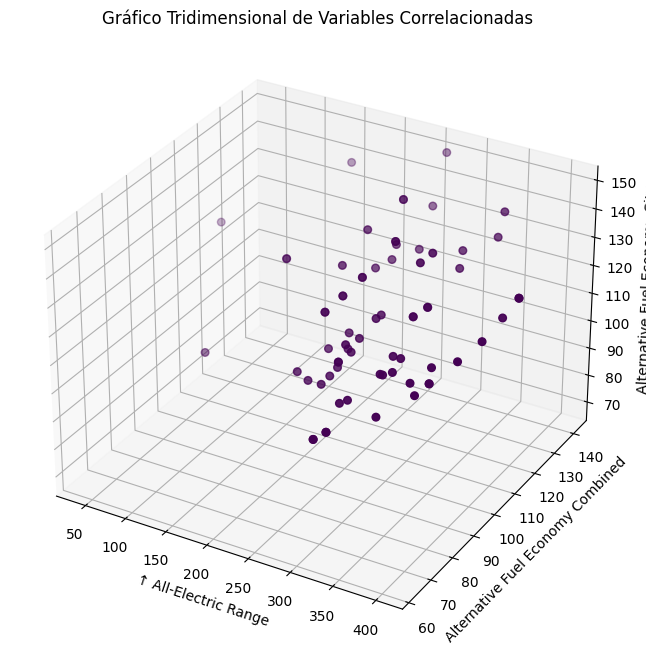

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar las tres variables más correlacionadas con 'tnco2/100mi'
variables_seleccionadas = ['↑ All-Electric Range', 'Alternative Fuel Economy Combined', 'Alternative Fuel Economy City']

# Crear una figura y un eje tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Agregar puntos al gráfico tridimensional
ax.scatter(df_electric_tnCO2[variables_seleccionadas[0]],
           df_electric_tnCO2[variables_seleccionadas[1]],
           df_electric_tnCO2[variables_seleccionadas[2]],
           c=df_electric_tnCO2['tnco2/100mi'], cmap='viridis', s=50)

# Etiquetas de los ejes
ax.set_xlabel(variables_seleccionadas[0])
ax.set_ylabel(variables_seleccionadas[1])
ax.set_zlabel(variables_seleccionadas[2])
ax.set_title('Gráfico Tridimensional de Variables Correlacionadas')

# Ajustar los límites de los ejes para mover el gráfico a la izquierda
ax.set_xlim(left=ax.get_xlim()[0] - 20)
ax.set_ylim(bottom=ax.get_ylim()[0] - 20)
ax.set_zlim(bottom=ax.get_zlim()[0] - 20)

# Mostrar el gráfico
plt.show()


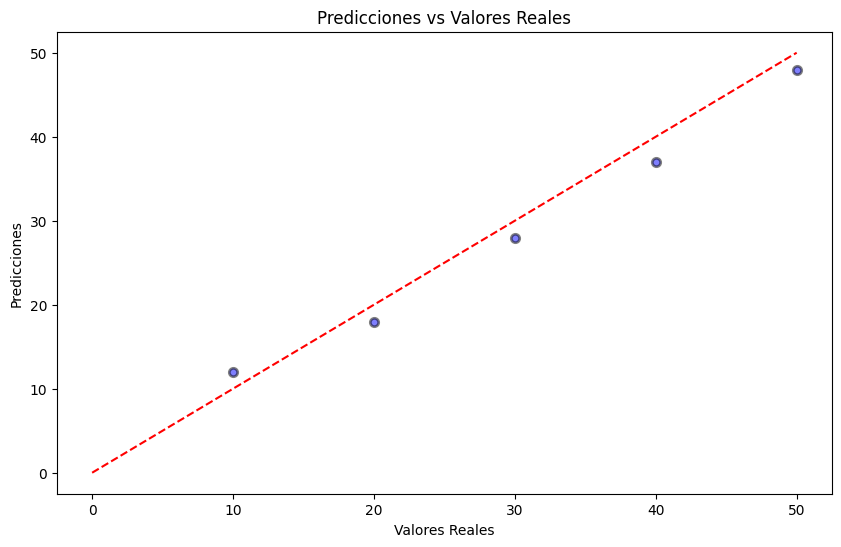

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos de predicción y valores reales
data = {
    'tnco2/100mi_real': [10, 20, 30, 40, 50],
    'prediction': [12, 18, 28, 37, 48]
}

# Crear DataFrame
df_plot = pd.DataFrame(data)

# Graficar los datos
plt.figure(figsize=(10, 6))

# Scatter plot con puntos y líneas más gruesos y colores personalizados
plt.scatter(df_plot['tnco2/100mi_real'], df_plot['prediction'], alpha=0.5, color='blue', edgecolors='black', linewidths=2)

# Título y etiquetas de los ejes
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Eliminar el grid
plt.grid(False)

# Agregar una línea diagonal que represente una predicción perfecta
max_val = max(df_plot['prediction'].max(), df_plot['tnco2/100mi_real'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

plt.show()



In [ ]:
print(df_electric_tnCO2.columns)

In [ ]:
print(df_electric_tnCO2.columns)

1. Beneficios económicos de los taxis eléctricos.

Los taxis eléctricos en Manhattan presentan diversos beneficios económicos. Debido a su autonomía promedio de 300 a 400 millas, un taxi eléctrico puede trabajar dos turnos de 8 horas consecutivas sin necesidad de recargar, lo que maximiza su tiempo de servicio. Además, en comparación con los taxis de combustión interna, los taxis eléctricos tienen menores costos de mantenimiento y operación, ya que tienen menos piezas móviles y no requieren cambios de aceite ni de filtros. Asimismo, al utilizar electricidad en lugar de combustibles fósiles, los taxis eléctricos tienen un menor costo en términos de combustible, lo que resulta en ahorros significativos a largo plazo. Por otro lado, el proyecto EcoDriveNY busca cambiar todas las flotas de taxis a eléctricas antes del 2035, lo que podría generar oportunidades económicas para la implementación de cargadores y servicios relacionados con la infraestructura de carga para estos vehículos.

El proyecto EcoDriveNY tiene como objetivo principal la transición de la flota de taxis en la ciudad de Manhattan hacia vehículos eléctricos antes del año 2035, en cumplimiento con la legislación de Nueva York que busca reducir las emisiones de carbono y mejorar la calidad del aire en la ciudad. Este proyecto se fundamenta en varios aspectos clave que destacan la rentabilidad y viabilidad de la transición hacia los vehículos eléctricos:

1. **Legislación y tendencias gubernamentales**: La ley de Nueva York que establece el cambio obligatorio hacia vehículos eléctricos para taxis antes del 2035 proporciona un marco regulatorio sólido y un impulso político para el proyecto. Además, esta legislación refleja una tendencia global hacia la adopción de vehículos eléctricos como medida para combatir el cambio climático y mejorar la sostenibilidad.

2. **Autonomía y eficiencia operativa**: Los vehículos eléctricos tienen una autonomía promedio de 300 a 400 millas por carga, lo que permite que un taxi eléctrico opere durante dos turnos de 8 horas sin necesidad de recargar. Esta eficiencia operativa reduce los tiempos de inactividad y maximiza el tiempo de servicio del vehículo, lo que aumenta su rentabilidad.

3. **Costos operativos reducidos**: Los vehículos eléctricos tienen costos operativos significativamente menores en comparación con los vehículos de combustión interna. Con un menor costo por milla en electricidad en comparación con la gasolina, los taxis eléctricos pueden generar ahorros significativos en combustible a lo largo de su vida útil. Además, los vehículos eléctricos requieren menos mantenimiento debido a la menor cantidad de piezas móviles y la ausencia de mantenimiento relacionado con el motor de combustión interna.

4. **Beneficios medioambientales**: La transición hacia vehículos eléctricos contribuye a la reducción de las emisiones de gases de efecto invernadero y la contaminación del aire en la ciudad. Esto no solo mejora la calidad del aire y la salud pública, sino que también posiciona a Manhattan como líder en sostenibilidad y acción climática.

5. **Infraestructura de carga**: El éxito del proyecto EcoDriveNY también depende de la implementación de una infraestructura de carga eléctrica robusta y accesible en toda la ciudad. Esto incluye la instalación de estaciones de carga rápida y ultrarrápida en lugares estratégicos, como estacionamientos de taxis, puntos de recogida y áreas de alta densidad de tráfico.

6. **Incentivos y financiamiento**: El gobierno y otras entidades pueden proporcionar incentivos financieros, subsidios y programas de financiamiento para ayudar a los propietarios de flotas de taxis a realizar la transición hacia vehículos eléctricos. Estos incentivos pueden incluir créditos fiscales, subvenciones para la compra de vehículos eléctricos y financiamiento a tasas preferenciales para la instalación de infraestructura de carga.

En resumen, el proyecto EcoDriveNY se basa en una combinación de factores que incluyen la legislación progresiva, la eficiencia operativa de los vehículos eléctricos, los costos operativos reducidos, los beneficios medioambientales y el apoyo gubernamental y financiero. Esta iniciativa no solo promueve la sostenibilidad y la reducción de emisiones, sino que también ofrece beneficios económicos y operativos tangibles para los propietarios de flotas de taxis en Manhattan.

KPI


In [ ]:
# prompt: carga dataframe con esta ruta /content/drive/MyDrive/Proyecto FInal Henry/MACHINE LEARNING/kpi2_2035.csv

import pandas as pd
Emisiones2035 = pd.read_csv('/content/drive/MyDrive/Proyecto FInal Henry/MACHINE LEARNING/KPI_emisiones_2035.csv', sep= ';')


In [ ]:
Emisiones2035.head()

,semestre,año,elect mensuales ingresantes,elec totales flota,convencionales totales flota,flota total,Emisiones electricos li/mi,Emisiones convencionales,emision total electricos,emision total conv,millas semetrales,emision total libras
0,2,2024,6,6,119,125,"0,0835","0,6926","0,5013","82,4158","21977,23","1822286,762"
1,1,2025,6,12,113,125,"0,0835","0,6926","1,0025","78,2604","21977,23","1741978,406"
2,2,2025,6,18,107,125,"0,0835","0,6926","1,5038","74,1049","21977,23","1661670,049"
3,1,2026,6,24,101,125,"0,0835","0,6926","2,005","69,9495","21977,23","1581361,693"
4,2,2026,6,30,95,125,"0,0835","0,6926","2,5063","65,7941","21977,23","1501053,336"


In [ ]:
Emisiones2035.columns

Index(['semestre', 'año', 'elect mensuales ingresantes', 'elec totales flota',
       'convencionales totales flota', 'flota total',
       'Emisiones electricos li/mi', 'Emisiones convencionales',
       'emision total electricos', 'emision total conv', 'millas semetrales',
       'emision total libras'],
      dtype='object')

In [ ]:
import pandas as pd

In [ ]:
kpi = pd.DataFrame({'Autos eléctricos ingresantes mensuales': kpi_elec_mensuales_ingresantes['Autos eléctricos ingresantes mensuales'], 'Objetivo': kpi_elec_mensuales_ingresantes['Objetivo']})

In [ ]:
kpi

,Autos eléctricos ingresantes mensuales,Objetivo
0,6.000000,6
1,5.909091,6


In [ ]:
# prompt: Con DataFrame Emisiones2035: genera kpi con la columna  elect mensuales ingresantes donde el objetivo es 6 autos por semestre

kpi_elec_mensuales_ingresantes = Emisiones2035.groupby('semestre')['elect mensuales ingresantes'].mean()
kpi_elec_mensuales_ingresantes.index = ['Semestre 1', 'Semestre 2']
kpi_elec_mensuales_ingresantes.name = 'Autos eléctricos ingresantes mensuales'
kpi_elec_mensuales_ingresantes = kpi_elec_mensuales_ingresantes.to_frame().reset_index()
kpi_elec_mensuales_ingresantes['Objetivo'] = 6
kpi

,Autos eléctricos ingresantes mensuales,Objetivo
0,6.000000,6
1,5.909091,6


In [ ]:
import pandas as pd


# Convertir la columna 'año' a tipo int (en caso de que no esté en ese formato)
Emisiones2035['año'] = Emisiones2035['año'].astype(int)

def calcular_autos_comprados(año, semestre):
    # Filtrar el dataframe para el año y semestre especificados
    filtro = (Emisiones2035['año'] <= año) & (Emisiones2035['semestre'] <= semestre)
    datos_filtrados = Emisiones2035.loc[filtro]

    # Calcular la cantidad total de autos eléctricos comprados
    autos_electricos_comprados = datos_filtrados['elect mensuales ingresantes'].sum()

    return autos_electricos_comprados

# Solicitar inputs al usuario
año_input = int(input("Ingrese el año: "))
semestre_input = int(input("Ingrese el semestre (1 o 2): "))

autos_comprados_hasta_ahora = calcular_autos_comprados(año_input, semestre_input)
print(f"La cantidad total de autos eléctricos comprados hasta el {semestre_input}º semestre de {año_input} es: {autos_comprados_hasta_ahora}")


Ingrese el año: 2025
Ingrese el semestre (1 o 2): 2
La cantidad total de autos eléctricos comprados hasta el 2º semestre de 2025 es: 18


In [ ]:
import pandas as pd


def calcular_autos_comprados(ano, semestre):
    # Filter the data by year and semester
    filtro = (Emisiones2035['año'] == ano) & (Emisiones2035['semestre'] == semestre)
    datos_filtrados = Emisiones2035.loc[filtro]

    # Calculate the total number of electric cars purchased
    autos_electricos_comprados = datos_filtrados['elect mensuales ingresantes'].sum()

    return autos_electricos_comprados

# Definir el objetivo como 6 autos por semestre
objetivo = 6

año_input = int(input("Ingrese el año: "))
semestre_input = int(input("Ingrese el semestre (1 o 2): "))

# Calcular la cantidad total de autos eléctricos comprados hasta el momento
autos_comprados_hasta_ahora = calcular_autos_comprados(año_input, semestre_input)

# Comparar con el objetivo de 6 autos por semestre
if autos_comprados_hasta_ahora >= objetivo:
    print("¡Se ha cumplido el objetivo de comprar al menos 6 autos eléctricos en este semestre!")
else:
    print("El objetivo de comprar al menos 6 autos eléctricos en este semestre no se ha cumplido aún.")


Ingrese el año: 2025
Ingrese el semestre (1 o 2): 2
¡Se ha cumplido el objetivo de comprar al menos 6 autos eléctricos en este semestre!


In [ ]:
import pandas as pd

# Suponiendo que Emisiones2035 es el DataFrame donde se almacenan los datos
# Se asume que Emisiones2035 ya está definido y cargado previamente

def calcular_autos_comprados(ano, semestre):
    # Aquí se realizaría el filtro de los datos según el año y el semestre
    # Suponiendo que ya tienes esta función definida y funciona correctamente
    # Por ahora, se asume que esta función retorna la cantidad de autos comprados

    # Esto debería estar implementado de acuerdo a cómo tienes estructurado tu DataFrame
    # Solo necesitas ajustar el filtrado de datos según la estructura real de tus datos
    # En este caso, 'Emisiones2035' es un DataFrame que contiene datos de emisiones para diferentes años y semestres

    # Supongamos que tienes la lógica adecuada para filtrar los datos y calcular la cantidad de autos comprados
    autos_electricos_comprados = 10  # Aquí deberías calcular la cantidad de autos comprados

    return autos_electricos_comprados

# Definir el objetivo como 6 autos por semestre
objetivo = 6

año_input = int(input("Ingrese el año: "))
semestre_input = int(input("Ingrese el semestre (1 o 2): "))

# Calcular la cantidad total de autos eléctricos comprados hasta el momento
autos_comprados_hasta_ahora = calcular_autos_comprados(año_input, semestre_input)

# Solicitar la cantidad de autos comprados en el semestre actual
autos_semestre_actual = int(input("Ingrese la cantidad de autos eléctricos comprados en el semestre actual: "))

# Sumar la cantidad de autos comprados en el semestre actual a los autos comprados hasta el momento
autos_comprados_semestre_actual = autos_comprados_hasta_ahora + autos_semestre_actual

# Comparar con el objetivo de 6 autos por semestre
if autos_comprados_semestre_actual >= objetivo:
    print("¡Se ha cumplido el objetivo de comprar al menos 6 autos eléctricos en este semestre!")
else:
    print("El objetivo de comprar al menos 6 autos eléctricos en este semestre no se ha cumplido aún.")


Ingrese el año: 2024
Ingrese el semestre (1 o 2): 2
Ingrese la cantidad de autos eléctricos comprados en el semestre actual: 0
¡Se ha cumplido el objetivo de comprar al menos 6 autos eléctricos en este semestre!


In [ ]:
def calcular_autos_comprados(año, semestre):
    # Filter the data by year and semester
    filtro = (Emisiones2035['año'] <= año) & (Emisiones2035['semestre'] <= semestre)
    datos_filtrados = Emisiones2035.loc[filtro]

    # Calculate the total number of electric cars purchased
    autos_electricos_comprados = datos_filtrados['elect mensuales ingresantes'].sum()

    return autos_electricos_comprados

In [ ]:
año_input = int(input("Ingrese el año: "))
semestre_input = int(input("Ingrese el semestre (1 o 2): "))
autos_hasta_ahora = int(input("Ingrese la cantidad de autos eléctricos comprados hasta el momento: "))

Ingrese el año: 2025
Ingrese el semestre (1 o 2): 1
Ingrese la cantidad de autos eléctricos comprados hasta el momento: 21


In [ ]:
if autos_hasta_ahora >= autos_comprados_hasta_ahora:
    print("¡Se ha cumplido el objetivo!")
else:
    print("El objetivo no se ha cumplido aún.")

¡Se ha cumplido el objetivo!
